In [226]:
import numpy as np
#import datasets
from sklearn import datasets
#matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [227]:
# vector distance
# Find the distance between vectors
def vecDist(vec1,vec2):
    vecDiff = vec1-vec2
    #compute the distance ("pitagoras")
    vecSqr =  np.square(vecDiff)
    vecSum =  np.sum(vecSqr)
    return np.sqrt(vecSum)

In [228]:
# plot data
# Plot the data with colored labels
def plotData(data, labels,fNames,col1,col2,labelsType):
    #plot the titles
    plt.title("The Iris Dataset " + labelsType +  " labels")
    plt.xlabel(fNames[col1])
    plt.ylabel(fNames[col2])
    # plot the data with different color for every label and size of 50 pixels
    myPlot = plt.scatter(data[:,col1],data[:,col2],c = labels, s=50)
    plt.legend(handles=myPlot.legend_elements()[0], labels=list(set(labels)))
    plt.show()

In [229]:
# split to train and test
# Load Iris dataset
Iris = datasets.load_iris()
data = Iris.data
labels = Iris.target+1 # true labeling
fNames = Iris.feature_names

In [230]:
samples = np.array([0,50,100])

In [231]:
delta = 25

In [232]:
# Split the data into test and train data
trainData = np.concatenate([data[samples[0]:samples[0]+delta],
                       data[samples[1]:samples[1]+delta],
                       data[samples[2]:samples[2]+delta]],axis=0)

trainLabels = np.concatenate([labels[samples[0]:samples[0]+delta],
                        labels[samples[1]:samples[1]+delta],
                        labels[samples[2]:samples[2]+delta]])

In [233]:
samples+=25

In [234]:
testData = np.concatenate([data[samples[0]:samples[0]+delta],
                      data[samples[1]:samples[1]+delta],
                      data[samples[2]:samples[2]+delta]],axis=0)

testLabels = np.concatenate([labels[samples[0]:samples[0]+delta],
                        labels[samples[1]:samples[1]+delta],
                        labels[samples[2]:samples[2]+delta]])

In [235]:
# knn pridict sample
# Predicted a data sample using the KNN algorithm with k=1

# take a sample from the test group and predict its label type
testI = 50
testDataI=testData[testI,:]

In [236]:
# Find the  distance between the selected sample and all the
# samples in the training group
dist = np.zeros(trainLabels.size)
for i,trainDataI in enumerate(trainData):
    dist[i] = vecDist(testDataI,trainDataI)

In [237]:
# find the index of the train sample with the mininum distance
# to the selected sample
predictI = np.argmin(dist)
# get the label of the found sample
predictedLabel = trainLabels[predictI]
print("Sample:", testI, "predicted label:", predictedLabel, "true label",testLabels[testI])

Sample: 50 predicted label: 3 true label 3


In [238]:
# built-in knn predict sample
# Use knn build in algorithm

# choose the number of neigbors
k=1
# prepare the knn model with the given k
knn = KNeighborsClassifier(n_neighbors=k)
# Build the knn model with the given data
knn.fit(trainData, trainLabels)

KNeighborsClassifier(n_neighbors=1)

In [239]:
# predict the given sample
predictI = knn.predict([testDataI])
print("Sample:", testI, "predicted label:", predictedLabel, "true label",testLabels[testI])

Sample: 50 predicted label: 3 true label 3


In [240]:
# predict all the data in the test grpoup
predictedLabels = knn.predict(testData)

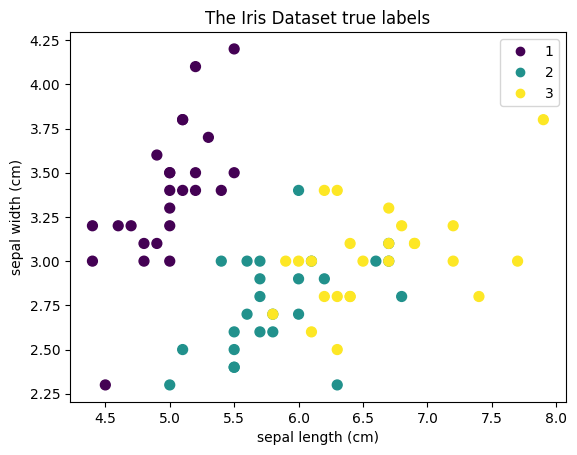

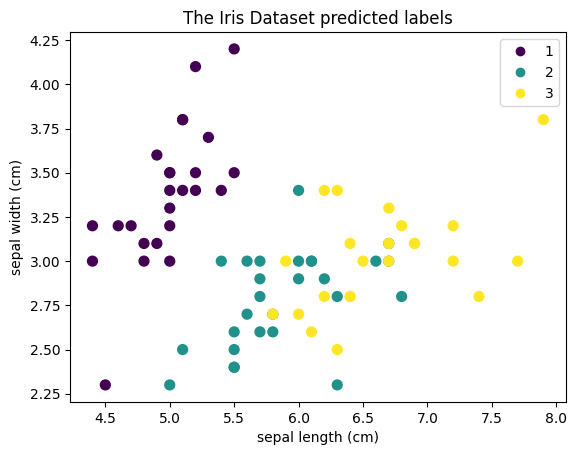

In [241]:
# plot the samples in the test group with the true and the predicted labels
plotData(testData,testLabels,fNames,0,1,"true")
plotData(testData,predictedLabels,fNames,0,1,"predicted")

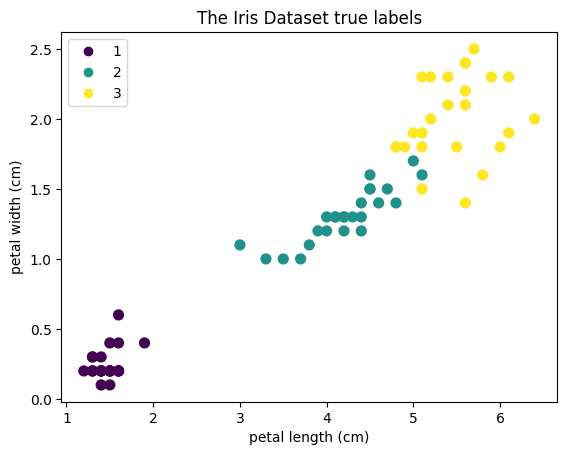

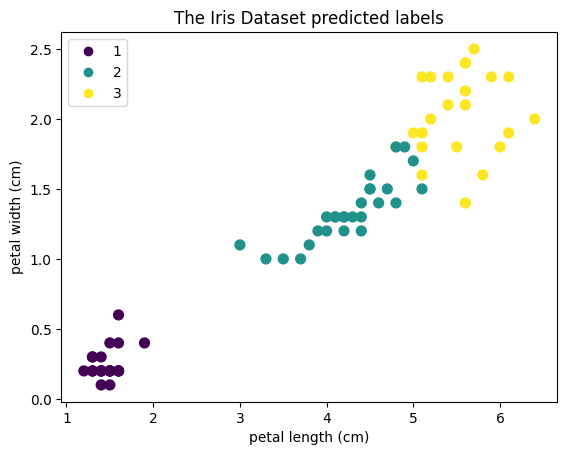

In [242]:
plotData(testData,testLabels,fNames,2,3,"true")
plotData(testData,predictedLabels,fNames,2,3,"predicted")

In [243]:
samples -=25

In [244]:
delta = 30

In [245]:
trainData = np.concatenate([data[samples[0]:samples[0]+delta],
                      data[samples[1]:samples[1]+delta],
                      data[samples[2]:samples[2]+delta]],axis=0)

trainLabels = np.concatenate([labels[samples[0]:samples[0]+delta],
                        labels[samples[1]:samples[1]+delta],
                        labels[samples[2]:samples[2]+delta]])

In [246]:
samples +=30
delta = 20

In [247]:
testData = np.concatenate([data[samples[0]:samples[0]+delta],
                      data[samples[1]:samples[1]+delta],
                      data[samples[2]:samples[2]+delta]],axis=0)

testLabels = np.concatenate([labels[samples[0]:samples[0]+delta],
                        labels[samples[1]:samples[1]+delta],
                        labels[samples[2]:samples[2]+delta]])


In [248]:
# Find the KNN predicted labels for all test samples using the minimum distance method

predictedLabels_min_dist = np.zeros(testLabels.size)

for i, testDataI in enumerate(testData):
    # Find the distance between the selected sample and all the
    # samples in the training group
    dist = np.zeros(trainLabels.size)
    for j, trainDataJ in enumerate(trainData):
        dist[j] = vecDist(testDataI, trainDataJ)

    # find the index of the train sample with the minimum distance
    # to the selected sample
    predictI = np.argmin(dist)

    # get the label of the found sample and store it
    predictedLabels_min_dist[i] = trainLabels[predictI]

print("Predicted labels using minimum distance method:", predictedLabels_min_dist)


Predicted labels using minimum distance method: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 3.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 2. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


In [249]:
# Add a comparison to the real testLabels
errors_min_dist = np.sum(predictedLabels_min_dist != testLabels)
print(f"Number of errors using minimum distance method: {errors_min_dist}")
print("Predicted Labels:",  predictedLabels_min_dist)
print("True test labels:", testLabels)

Number of errors using minimum distance method: 2
Predicted Labels: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 3.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 2. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
True test labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [250]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(trainData, trainLabels)
predictedLabels = knn.predict(testData)


In [251]:
errors_min_dist = np.sum(predictedLabels != testLabels)
print(f"Number of errors using minimum distance method: {errors_min_dist}")
print("Predicted Labels:",  predictedLabels)
print("True test labels:", testLabels)


Number of errors using minimum distance method: 2
Predicted Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
True test labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
